# Building a Neural Network from scratch


You can make complex high level models using keras, but it is unclear how they work without using the equations

# Problem


Digit Classification using MNIST Dataset

# Mathematical Aspects


We start with 28x28 pixel images for training. Each has a value b/w 0-255 (White to Black)

We can represent this in a 28x28 matrix

We transpose this matrix (Why?)

We want to preprocess this and figure out what digit that image represents using a NN

We will build a NN with 2 layers. First (INPUT) will have 784 layers, HIDDEN Layer will have 10 and output layer will have 10 as well (0-9)

Input layer will be 0 as it is not exactly part of our network. Hidden will be layer 1, Output as layer 2

We train the network in 3 parts : 

1. FORWARD PROPOGATION : Taking an image and running throught the network to get output

    A^[0] = X (784 * m)

  We do not need to process more in the input layer

1. We neeed to get an unactivated hidden layer by adding a weight and a bias to the first layer

    Z^[1] = W^[1] * A^[1] + b ^ [1]

1. We apply an activation function to it. This will shift from linear combination (LINEAR REGRESSION) to some other dimension
    
    A^[1] = g(Z^[1]) = ReLU(Z^[1])


Rectified Linear Unit : If x > 0, then ReLU(x) = x. If x < 0 then ReLu(x) = 0

We then need to add our activated first layer with weight and bias to the second layer as well

    Z^[2] = W^[2] * A^[1] + b^[2]

(ReLU, Sigmoid, Tantra)
  
In the second layer, we add another activation function called **SoftMax** because we want there to be some probability for each of the 10 output nodes.

    e^z, i / Sigma(e^z, j) for j = 1 till K
    (e^z, i) is the current node

This will return the probability of all 10 nodes. These values will be between 0 and 1 and the sum of all 10 will be 1


We now need to optimize the weights and biases. This is done using **Back Propogation**. We start with the prediction, calculate how much it deviated from the actual value, and calculate which weight contributed most to the change

    dZ[2] = A[2] - Y (y is one-hot encoded)
    dW[2] = Derivative of loss function
    dW[2] = 1/m * dZ[2] * A[1] TRANSPOSED

    db[2]. Average of absolute error : 1/m * Sigma(dZ[2])

    dZ[1]. W[2] TRANSPOSED * dZ[2] * g'(Z)
    We are taking the errors in reverse to get to the fist layer
    g'(Z) is the derivative of the activation function as we need to undo the functions effects 

    dW[1] : Weights of first layer
    dW[1] = 1/m * dZ[1] * X Transposed

    We want to see how much W1 and X1 contributed to error in first layer

    db[1] = 1/m * Sigma(dZ[1])
  

We then need to update our model accordingly : 

    W[1] = W[1] - Alpha * dW[1]
    Same for b[1], W[2] and b[2]


    Aplha : (Hyperparameter) Learning Rate : It is a parameter you set, NOT THE GRADIENT DESCENT
  

We continue this loop to find out what we need to train
    

# Connecting to Kaggle


Load your API credentials json file to the Collab Runtime

[Article](https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/)

In [16]:
! pip3 install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download -c digit-recognizer
! unzip digit-recognizer.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists
digit-recognizer.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  digit-recognizer.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [17]:
import numpy as np # Linear algebra and matrices
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
data = pd.read_csv('train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
data = np.array(data)
m, n = data.shape
# Split into training and testing. See OVERFITTING / Cross validation data

np.random.shuffle(data) # Shuffle before splitting

data_test = data[0:1000].T # Easier to split Y and X
Y_test = data_test[0] # Gives the sigit values
X_test = data_test[1:n] # 784 pixels, one in each column
X_test = X_test / 255.


data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.

_, m_train = X_train.shape

In [20]:
Y_train[0], X_train[:, 0].shape

(0, (784,))

In [41]:
def init_params():
  W1 = np.random.rand(10, 784) - 0.5
  # Difference between rand and randn
  b1 = np.random.rand(10, 1) - 0.5
  W2 = np.random.rand(10, 10) - 0.5
  b2 = np.random.rand(10, 1) - 0.5
  return W1, b1, W2, b2

def ReLU(Z) :
  return np.maximum(Z, 0) # Digitwise

def derivative_ReLU(Z):
  return Z > 0

def softmax(X) :
  return (np.exp(X) / sum(np.exp(X)))

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y) : 
  one_hot_Y = np.zeros((Y.size, Y.max() + 1)) # Size is M, Y max is 9 and  1 makes it 10
  one_hot_Y[np.arange(Y.size), Y] = 1 # Indexing using arays
  return one_hot_Y.T

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * derivative_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2


def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [43]:
def get_predictions(A2) :
  return np.argmax(A2, 0)

def get_accuracy(predictions, Y) : 
  print(predictions, Y)
  return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [44]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.1, 500)

Iteration:  120
[2 1 0 ... 7 2 3] [2 1 0 ... 7 2 3]
0.7215365853658536
Iteration:  130
[2 1 0 ... 7 2 3] [2 1 0 ... 7 2 3]
0.7351463414634146
Iteration:  140
[2 1 0 ... 7 2 3] [2 1 0 ... 7 2 3]
0.7475365853658537
Iteration:  150
[2 1 0 ... 7 2 3] [2 1 0 ... 7 2 3]
0.7572926829268293
Iteration:  160
[2 1 0 ... 7 2 3] [2 1 0 ... 7 2 3]
0.7660975609756098
Iteration:  170
[2 1 0 ... 7 2 3] [2 1 0 ... 7 2 3]
0.774219512195122
Iteration:  180
[2 1 0 ... 7 2 3] [2 1 0 ... 7 2 3]
0.7818780487804878
Iteration:  190
[2 1 0 ... 7 2 3] [2 1 0 ... 7 2 3]
0.7888048780487805
Iteration:  200
[2 1 0 ... 7 2 3] [2 1 0 ... 7 2 3]
0.7945121951219513
Iteration:  210
[2 1 0 ... 7 2 3] [2 1 0 ... 7 2 3]
0.8000243902439025
Iteration:  220
[2 1 0 ... 7 2 3] [2 1 0 ... 7 2 3]
0.8048780487804879
Iteration:  230
[2 1 0 ... 7 2 3] [2 1 0 ... 7 2 3]
0.8094146341463415
Iteration:  240
[2 1 0 ... 7 2 3] [2 1 0 ... 7 2 3]
0.8132926829268292
Iteration:  250
[2 1 0 ... 7 2 3] [2 1 0 ... 7 2 3]
0.8170731707317073
Iterati

In [45]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [2]
Label:  2


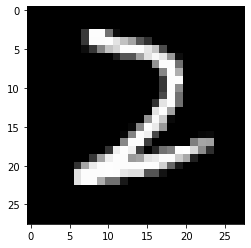

Prediction:  [1]
Label:  1


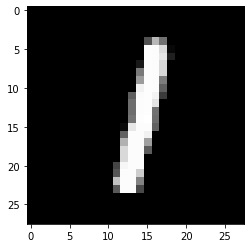

Prediction:  [0]
Label:  0


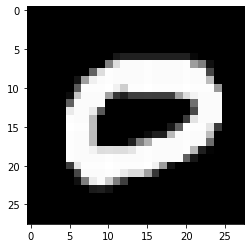

Prediction:  [1]
Label:  1


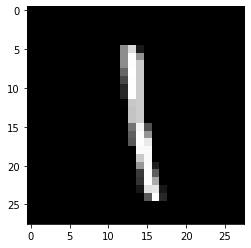

In [46]:
# Examples

test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [48]:
# Accuracy on dev set

dev_predictions = make_predictions(X_test, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_test)

[2 1 1 7 2 6 0 8 0 8 2 1 8 2 6 5 7 1 1 7 2 8 6 1 7 5 6 7 0 7 4 1 2 7 9 5 0
 4 1 2 9 6 8 6 8 1 9 8 8 2 7 1 9 4 0 4 9 5 4 6 7 7 6 2 1 6 8 0 4 5 9 9 7 8
 5 3 1 5 7 0 5 3 6 3 6 2 8 1 8 5 5 3 1 0 7 2 8 3 3 6 6 9 4 1 0 1 9 8 9 8 0
 4 0 0 8 7 3 3 1 9 2 7 1 2 6 7 1 2 3 8 4 3 5 9 1 0 8 8 8 4 6 0 5 8 4 1 0 6
 7 2 6 0 4 1 1 8 1 7 0 9 8 1 4 8 9 9 4 2 7 5 2 3 9 2 2 9 1 4 4 2 0 3 4 9 7
 8 1 0 1 0 3 8 3 8 8 2 6 0 4 5 0 8 7 2 8 4 0 1 8 0 8 2 6 4 0 1 0 1 9 9 9 0
 4 2 2 5 0 6 9 7 8 5 2 9 3 2 1 8 2 0 4 1 3 9 1 6 9 9 5 4 0 7 2 3 9 6 1 1 5
 4 3 0 2 2 3 0 6 9 3 1 5 4 9 6 4 9 6 1 9 5 4 3 0 4 9 1 6 2 3 0 1 1 3 3 5 3
 5 3 8 2 7 1 8 4 0 0 5 7 8 8 4 4 6 6 4 9 1 7 7 4 1 8 4 1 7 7 5 9 2 3 3 3 1
 9 7 1 3 7 2 8 4 9 1 3 7 1 7 8 9 2 2 5 0 2 1 6 1 8 2 3 4 7 0 5 9 1 5 0 8 3
 0 9 3 8 8 4 6 7 0 2 4 6 1 7 7 7 5 1 4 4 5 4 0 0 0 8 4 6 3 4 0 0 2 2 0 5 0
 1 2 3 3 4 6 1 0 6 2 5 4 1 5 2 9 0 4 4 9 3 0 3 6 4 8 9 6 3 8 2 1 1 4 7 9 6
 4 3 1 1 8 7 2 4 2 3 1 6 2 0 2 9 6 8 0 1 1 2 7 9 3 8 7 7 2 3 6 9 1 1 0 5 0
 6 4 0 8 5 0 1 3 0 0 9 3 

0.853